In [1]:
import os
go_up_n_directories = lambda path, n: os.path.abspath(
    os.path.join(*([os.path.dirname(path)] + [".."] * n))
)
try:
    suda=suda # will give an error if this cell has not run before
except:
    os.chdir(go_up_n_directories(os.getcwd(), 0))  # run once (otherwise restart kernel)
    suda=True

In [2]:
import pandas as pd
import numpy as np
import json
import utilities.visualization_utils as visualization_utils
import matplotlib.pyplot as plt

### Experiment 1: HP tuning 

In [3]:
# Load data for experiment 1
with open("visualizations/data/exp1_results.json") as json_file:
    exp1_results = json.load(json_file)

EFG

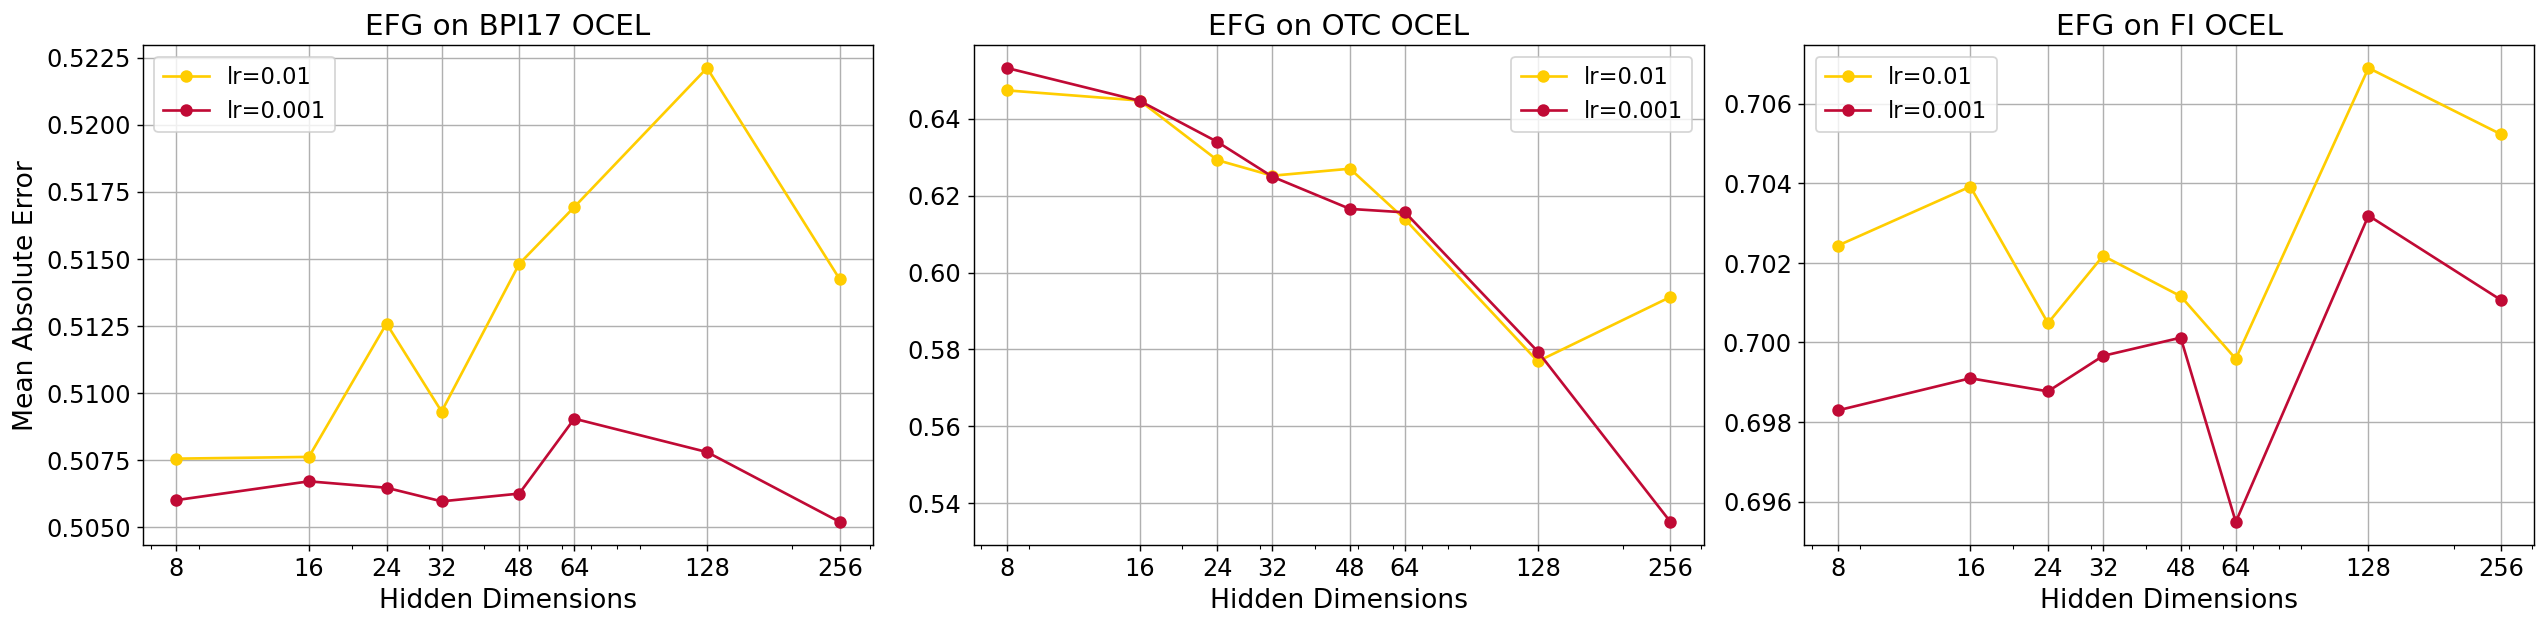

In [4]:
visualization_utils.create_exp1_encoding_plot(
    "efg", exp1_results, fontsize=15, save=True
)

HOEG

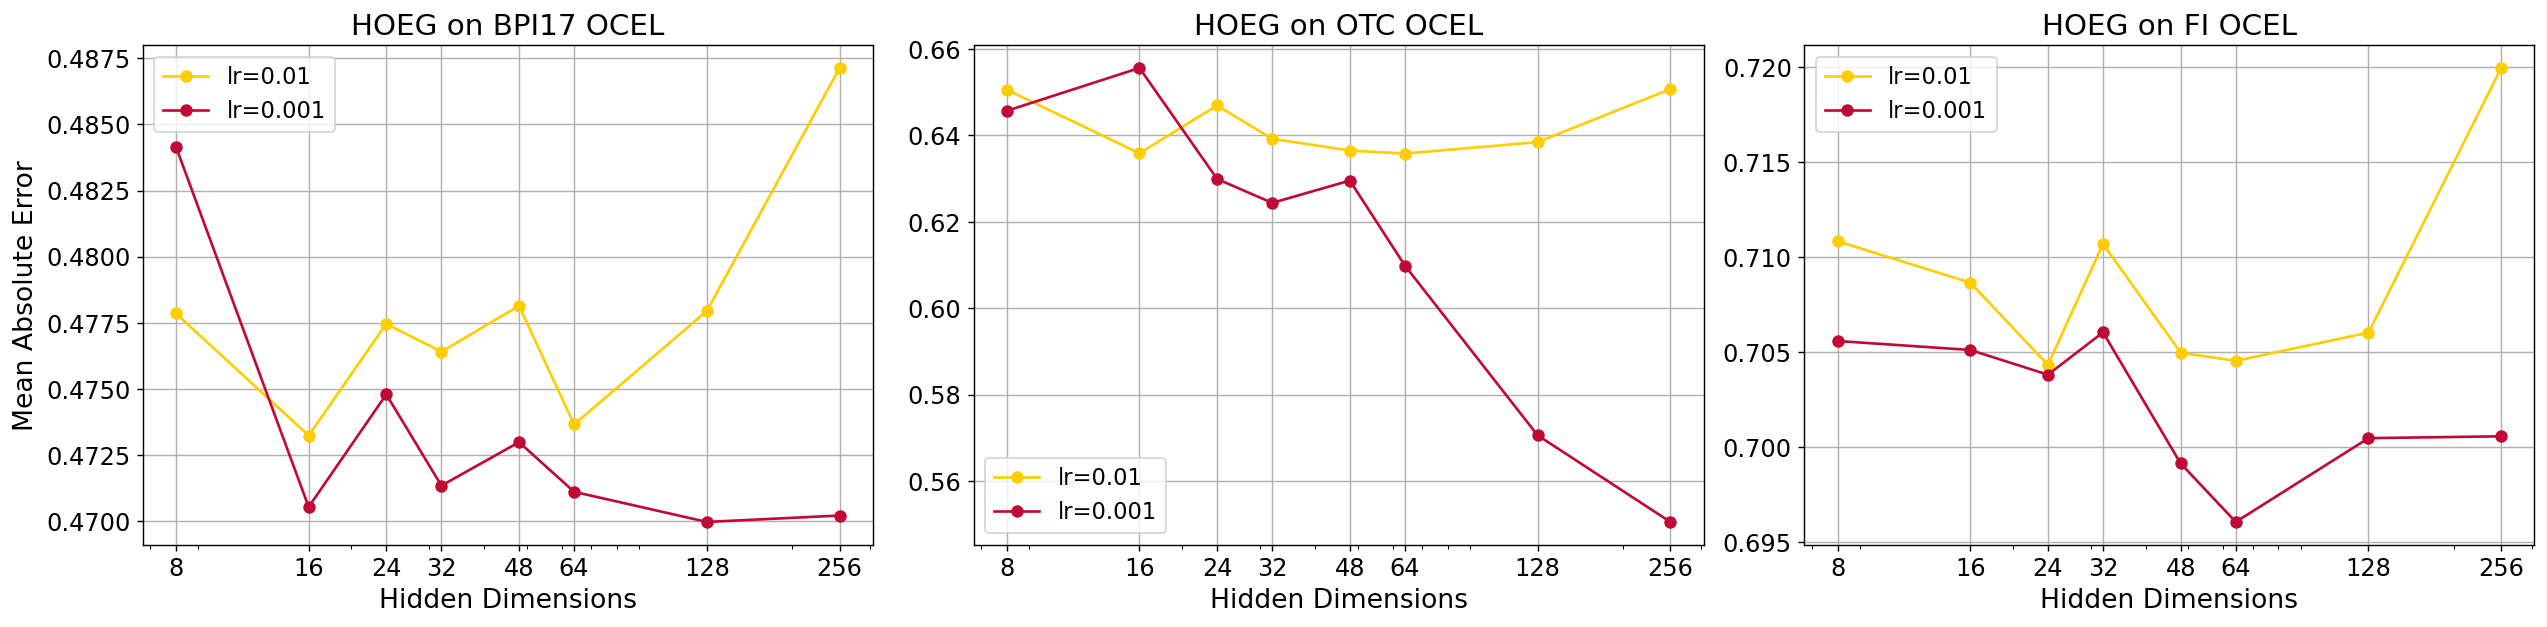

In [5]:
visualization_utils.create_exp1_encoding_plot(
    "hoeg", exp1_results, fontsize=15, save=True
)

### Experiment 2: Encoding Type

In [6]:
# Load data for experiment 2
with open("visualizations/data/exp2_results.json") as json_file:
    exp2_results = json.load(json_file)

#### Encoding Performance

BPI17

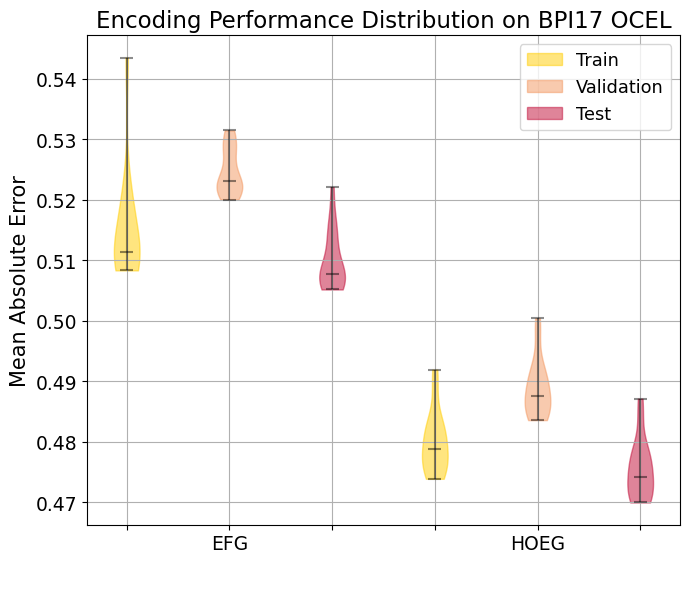

In [7]:
visualization_utils.create_exp2a_plot(
    encoding_performances=exp2_results["Encoding Performance"],
    dataset="BPI17",
    encoding_types=["efg", "hoeg"],
    fontsize=15,
    figsize=(7,6),
    save=True,
)

OTC

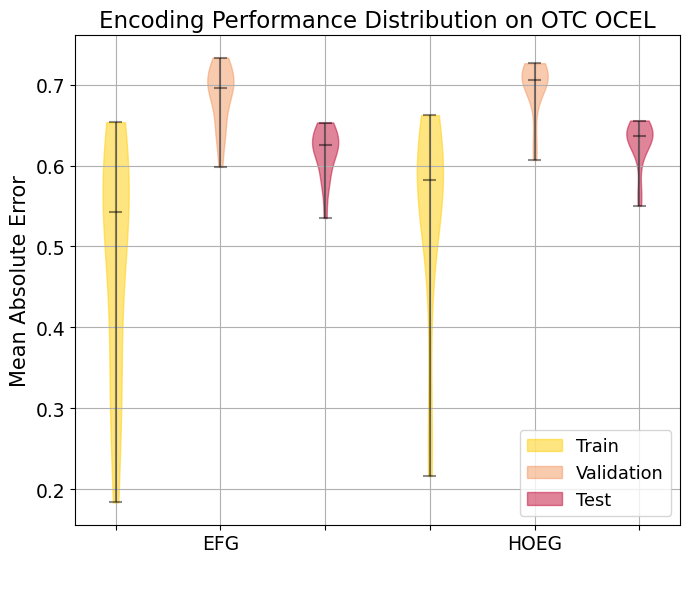

In [8]:
visualization_utils.create_exp2a_plot(
    encoding_performances=exp2_results["Encoding Performance"],
    dataset="OTC",
    encoding_types=["efg", "hoeg"],
    fontsize=15,
    figsize=(7,6),
    legend_location="lower right",
    save=True,
)

Financial Institution

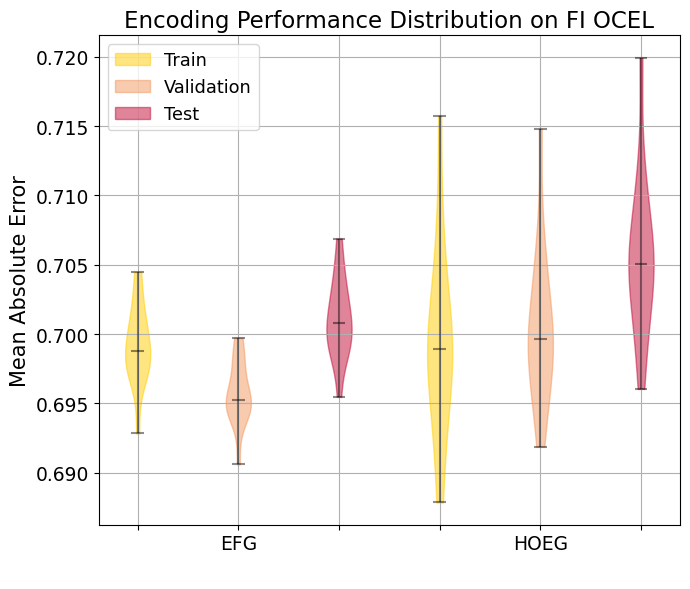

In [9]:
visualization_utils.create_exp2a_plot(
    exp2_results["Encoding Performance"],
    "Financial Institution",
    ["efg", "hoeg"],
    fontsize=15,
    figsize=(7,6),
    legend_location="upper left",
    save=True,
)

#### Learning Curve

BPI17

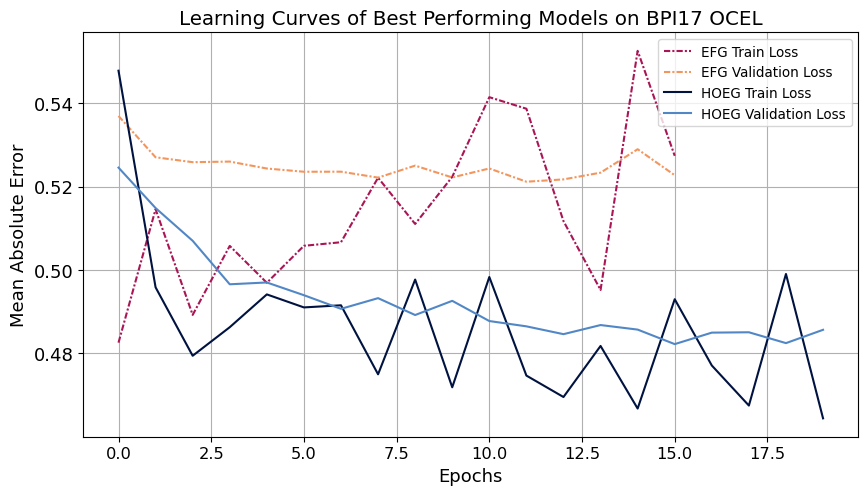

In [10]:
visualization_utils.get_exp2b_plot(
    "BPI17",
    encoding_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "hoeg": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    data_base_path="visualizations/data/learning_curves",
    figsize=(10, 5.25),
    fontsize=13,
    save=True,
)

OTC

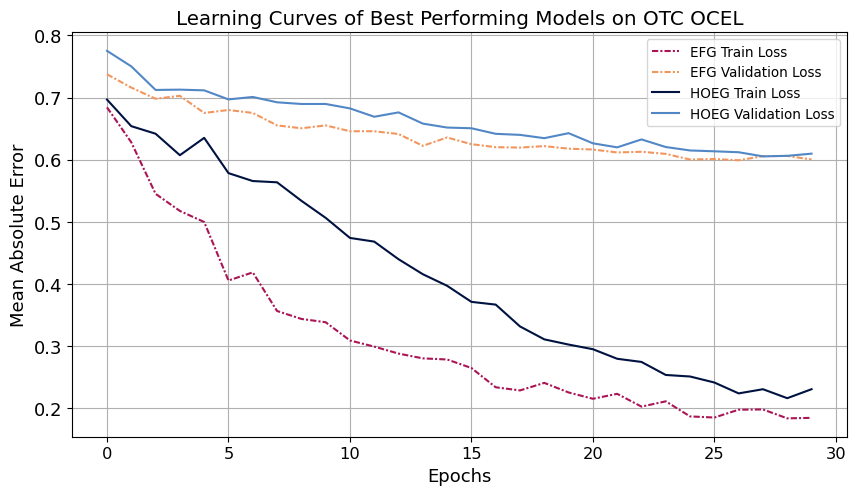

In [11]:
visualization_utils.get_exp2b_plot(
    "OTC",
    encoding_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "hoeg": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    data_base_path="visualizations/data/learning_curves",
    figsize=(10, 5.25),
    fontsize=13,
    save=True,
)

Financial Institution

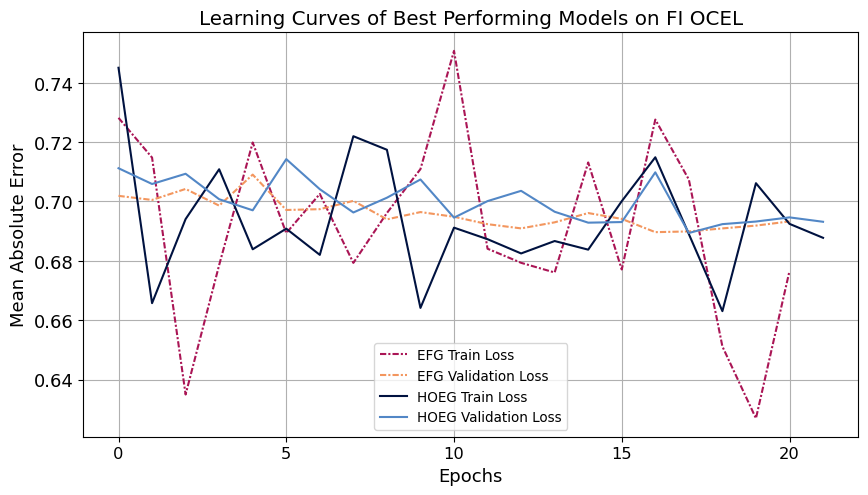

In [12]:
visualization_utils.get_exp2b_plot(
    "Financial Institution",
    encoding_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "hoeg": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    data_base_path="visualizations/data/learning_curves",
    figsize=(10, 5.25),
    fontsize=13,
    save=True,
)

### Experiment 3: Baseline

We create extensive tables, one per dataset.

### Appendices

Adams et al. (2022) learning curves per dataset

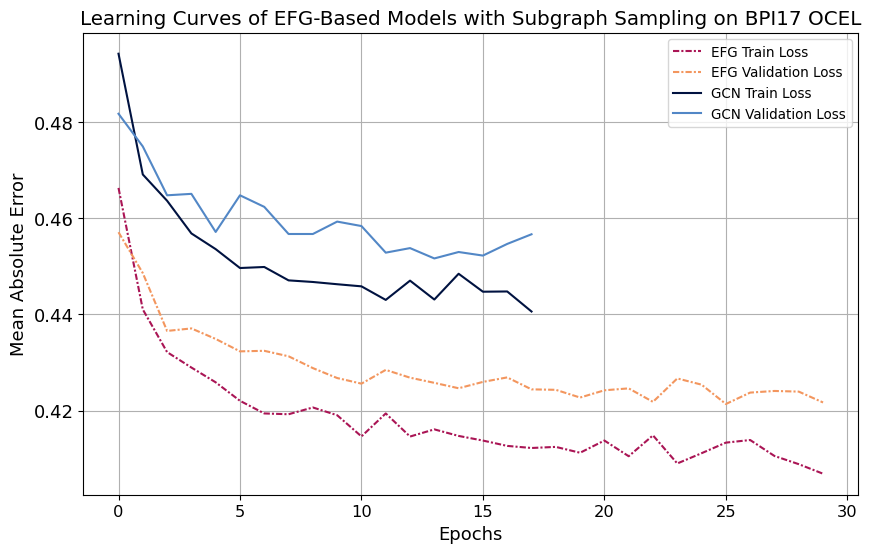

In [13]:
# Read data from CSV files
data_base_path="visualizations/data/subgraph_sampling_learning_curves/bpi17"

train_data_gcn = pd.read_csv(os.path.join(data_base_path,'lr=0.01_hidden_dim=24_AdamsGCN', 'train.csv'))
validation_data_gcn = pd.read_csv(os.path.join(data_base_path,'lr=0.01_hidden_dim=24_AdamsGCN', 'valid.csv'))

train_data_efg = pd.read_csv(os.path.join(data_base_path,'lr=0.001_hidden_dim=64_HigherOrderGNN_EFG', 'train.csv'))
validation_data_efg = pd.read_csv(os.path.join(data_base_path,'lr=0.001_hidden_dim=64_HigherOrderGNN_EFG', 'valid.csv'))

visualization_utils.get_subgraph_sampling_learning_curves(
    dataset="BPI17",
    model_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "gcn": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    train_datas=[train_data_efg, train_data_gcn],
    validation_datas=[validation_data_efg, validation_data_gcn],
    figsize=(10, 6),
    fontsize=13,
    save=True,
)